In [1]:
%matplotlib notebook
import IPython.display as ipd
import matplotlib.pyplot as plt
import util
import numpy as np

In [2]:
_, coded_sps_mean_A, coded_sps_std_A, coded_sps_max_A, log_f0s_mean_A, log_f0s_std_A = util.loadPickle('./cache36_suzuki.pkl')
_, coded_sps_mean_B, coded_sps_std_B, coded_sps_max_B, log_f0s_mean_B, log_f0s_std_B = util.loadPickle('./cache36_kinoshita.pkl')
src_path = 'datasets/suzuki/a01.wav'
dist_path = 'predict/log_a01_3_950.pkl'

In [3]:
wave = np.pad(util.loadWave(src_path), (50, 50), 'constant')
pwav = util.wavePadding(wave)
f0, sp, ap = util.worldDecompose(pwav)
psf0 = util.pitchConversion(f0, log_f0s_mean_A, log_f0s_std_A, log_f0s_mean_B, log_f0s_std_B)
coded_sp_norm = util.loadPickle(dist_path)

In [4]:
coded_sp_c = coded_sp_norm * coded_sps_max_B + coded_sps_mean_B
coded_sp_c = coded_sp_c.T
coded_sp_c = np.ascontiguousarray(coded_sp_c)
decoded_sp_c = util.worldDecodeSpectralEnvelop(coded_sp_c)
wave_transformed = util.worldSpeechSynthesis(psf0[:128*6], decoded_sp_c[:128*6], ap[:128*6])
wave_transformed = np.where(wave_transformed < -1, -1, wave_transformed)
wave_transformed = np.where(wave_transformed > 1, 1, wave_transformed)

<IPython.core.display.Javascript object>


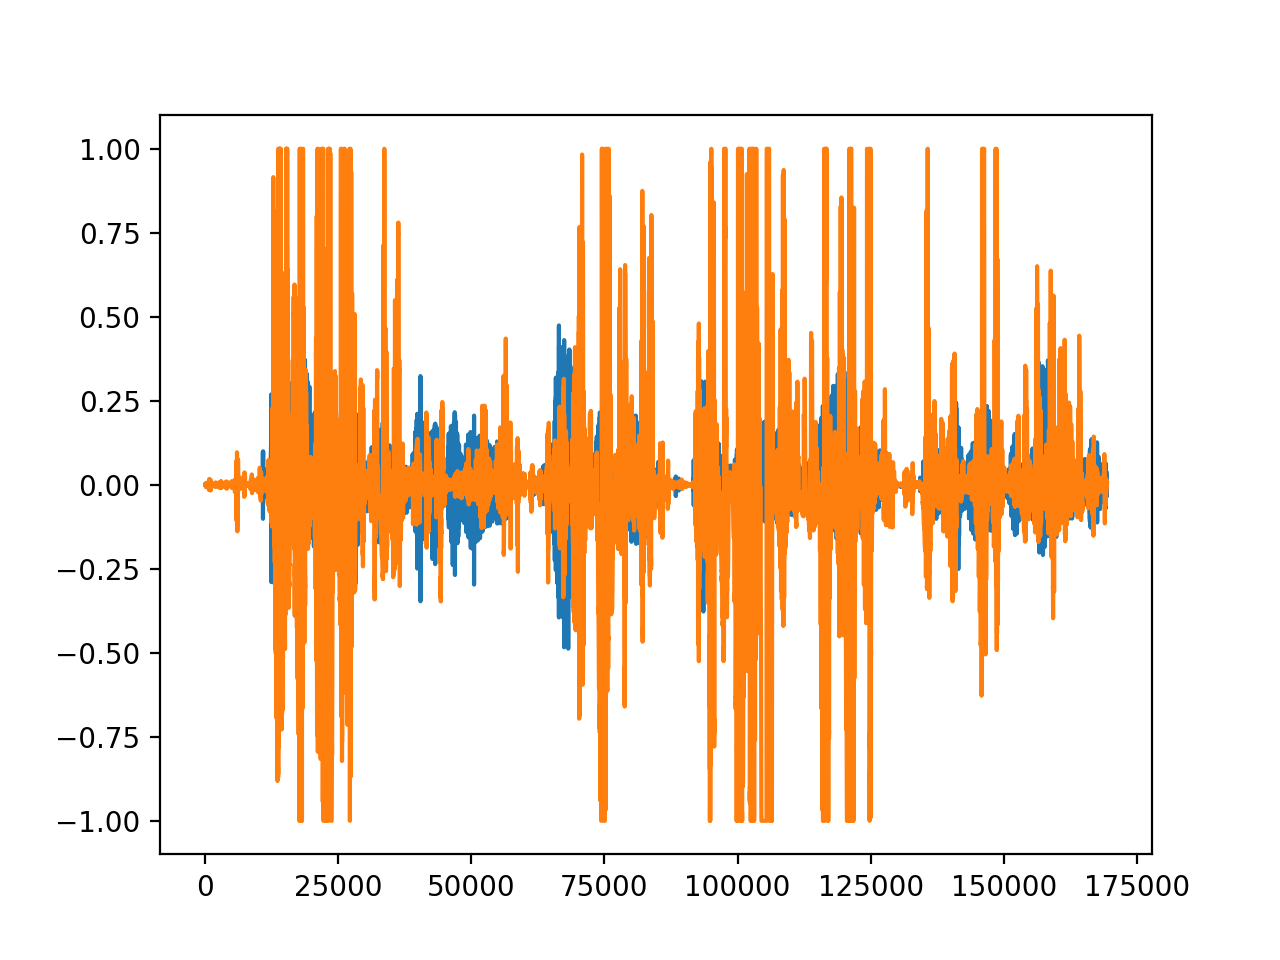

In [5]:
plt.plot(pwav[:wave_transformed.shape[0]])
plt.plot(wave_transformed)

In [6]:
ipd.Audio(pwav[:wave_transformed.shape[0]], rate=44100)

In [7]:
ipd.Audio(wave_transformed, rate=44100)